In [50]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns


import re


from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB





In [3]:
# 데이터셋 불러오기

df_train = pd.read_csv("datasets/titanic/train.csv", index_col= "PassengerId")
df_test = pd.read_csv("datasets/titanic/test.csv", index_col= "PassengerId")


df_all = pd.concat([df_train, df_test])


In [4]:
sns.set()
sns.set_color_codes()

def draw_line():
    print("-"*50)

### 데이터셋의 특성 정리

Survival: 생존 여부. 0 = 사망, 1 = 생존, 해당 프로젝트의 target<br>
Pclass: 좌석 등급. 1 = 1등석, 2 = 2등석, 3 = 3등석<br>
Sex: 성별. male = 남성, female = 여성<br>
Age: 나이<br>
SibSp: 동승한 Sibling = 형제자매 + Spouse = 배우자 의 수<br>
Parch: 동승한 Parent = 부모 + Child = 자식 의 수<br>
Ticket: 티켓 번호<br>
Fare: 요금<br>
Cabin: 방 호수<br>
Embarked: 타이타닉 호에 승객이 승선한 곳<br>

In [5]:
df_all.info()
print("Shape -> ", df_all.shape, )
draw_line()
df_all.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 1309 entries, 1 to 1309
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    float64
 1   Pclass    1309 non-null   int64  
 2   Name      1309 non-null   object 
 3   Sex       1309 non-null   object 
 4   Age       1046 non-null   float64
 5   SibSp     1309 non-null   int64  
 6   Parch     1309 non-null   int64  
 7   Ticket    1309 non-null   object 
 8   Fare      1308 non-null   float64
 9   Cabin     295 non-null    object 
 10  Embarked  1307 non-null   object 
dtypes: float64(3), int64(3), object(5)
memory usage: 122.7+ KB
Shape ->  (1309, 11)
--------------------------------------------------


,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,0.383838,2.294882,29.881138,0.498854,0.385027,33.295479
std,0.486592,0.837836,14.413493,1.041658,0.865560,51.758668
min,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


### 결측치 확인

In [6]:
#전체, 훈련, 테스트 데이터셋의 결측치 수 확인
pd.concat([df_all.isna().sum(), df_train.isna().sum(), df_test.isna().sum()], axis=1)

,0,1,2
Survived,418,0,NaN
Pclass,0,0,0.0
Name,0,0,0.0
Sex,0,0,0.0
Age,263,177,86.0
SibSp,0,0,0.0
Parch,0,0,0.0
Ticket,0,0,0.0
Fare,1,0,1.0
Cabin,1014,687,327.0


### Survived 

C:\Users\ys\AppData\Local\Temp\ipykernel_6956\4172330072.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Survived", data=df_train, palette="mako")


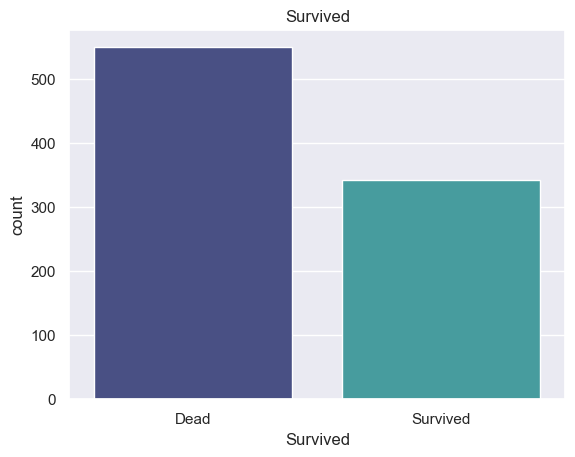

사망자와 생존자 비율 : 
 Survived
0    0.616162
1    0.383838
Name: proportion, dtype: float64


In [7]:

sns.countplot(x="Survived", data=df_train, palette="mako")
plt.xticks([0, 1], ["Dead", "Survived"])
plt.title("Survived")
plt.show()
print("사망자와 생존자 비율 : \n", df_train["Survived"].value_counts(normalize=True))

### Sex

C:\Users\ys\AppData\Local\Temp\ipykernel_6956\573874845.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Sex", data=df_train, ax=ax[0], palette="mako")


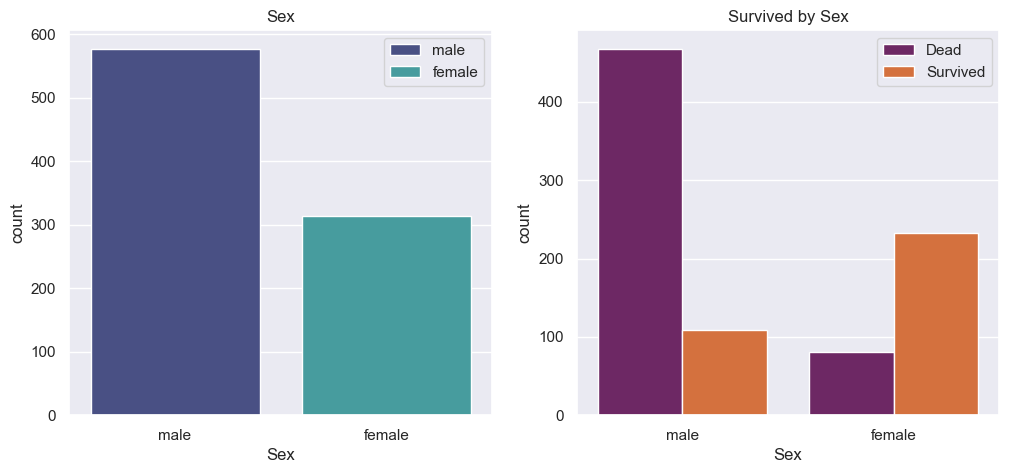

In [8]:
f, ax = plt.subplots(1, 2, figsize = (12, 5))

sns.countplot(x="Sex", data=df_train, ax=ax[0], palette="mako")
sns.countplot(x="Sex", hue="Survived", data=df_train, ax=ax[1], palette="inferno")
ax[0].set_title("Sex")
ax[1].set_title("Survived by Sex")
ax[0].legend(labels=["male", "female"])
ax[1].legend(labels=["Dead", "Survived"])

Text(0, 0.5, 'female')

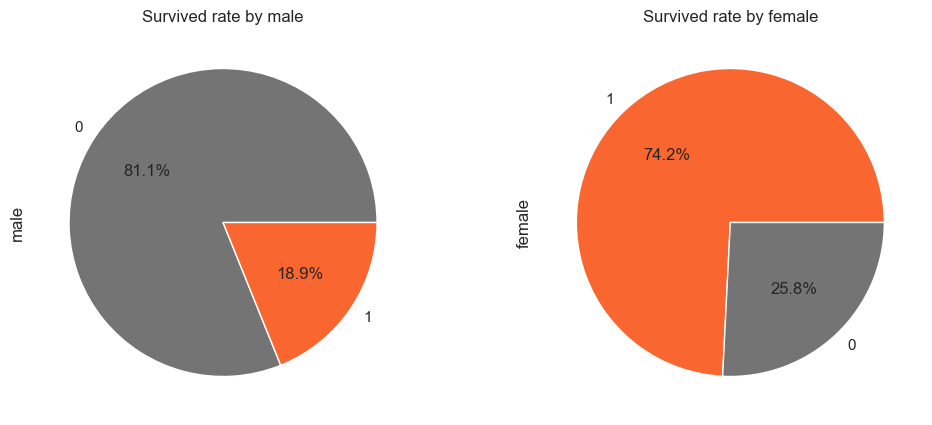

In [9]:
f, ax = plt.subplots(1, 2, figsize = (12, 5))

df_train["Survived"][df_train["Sex"] == "male"].value_counts().plot.pie(autopct="%1.1f%%", ax=ax[0], colors=["#747474", "#FA662F"])
df_train["Survived"][df_train["Sex"] == "female"].value_counts().plot.pie(autopct="%1.1f%%", ax=ax[1], colors=["#FA662F", "#747474"])
ax[0].set_ylabel("male")
ax[0].set_title("Survived rate by male")
ax[1].set_title("Survived rate by female")
ax[1].set_ylabel("female")

### Pclass

C:\Users\ys\AppData\Local\Temp\ipykernel_6956\3809289433.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x= "Pclass", data=df_train, ax=ax[0], palette="mako")


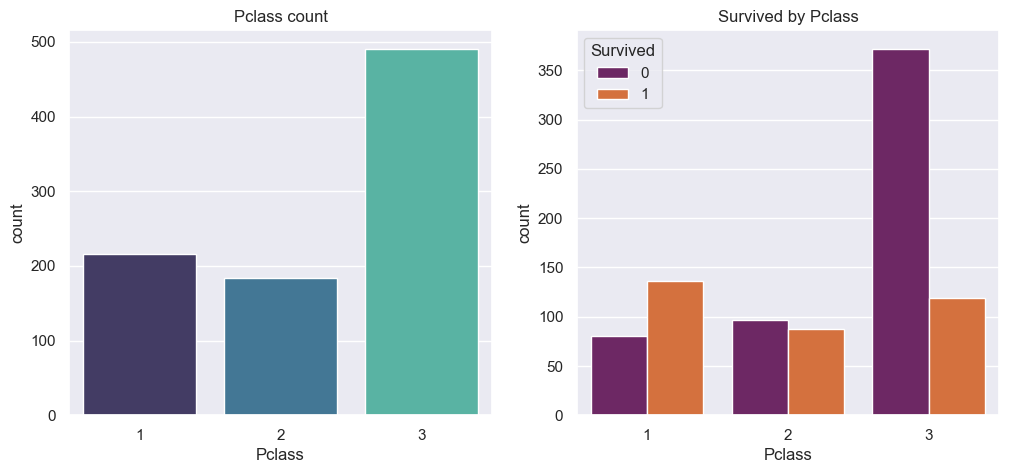

C:\Users\ys\AppData\Local\Temp\ipykernel_6956\3809289433.py:12: FutureWarning: The provided callable <function sum at 0x00000205F60DA660> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  df_gb = df_train.groupby(['Pclass']).agg(Survive = pd.NamedAgg('Survived', np.sum),All = pd.NamedAgg('Survived', np.size)).sort_index(level=[1,0])


,Survive,All,Survival_Rate
Pclass,,,
1,136,216,0.629630
2,87,184,0.472826
3,119,491,0.242363


In [10]:
f, ax = plt.subplots(1, 2, figsize=(12, 5))

sns.countplot(x= "Pclass", data=df_train, ax=ax[0], palette="mako")
ax[0].set_title("Pclass count")


sns.countplot(x= "Pclass", hue="Survived", data=df_train, ax=ax[1], palette="inferno")
ax[1].set_title("Survived by Pclass")
plt.show()


df_gb = df_train.groupby(['Pclass']).agg(Survive = pd.NamedAgg('Survived', np.sum),All = pd.NamedAgg('Survived', np.size)).sort_index(level=[1,0])
df_gb['Survival_Rate'] = df_gb['Survive'] / df_gb['All']

df_gb


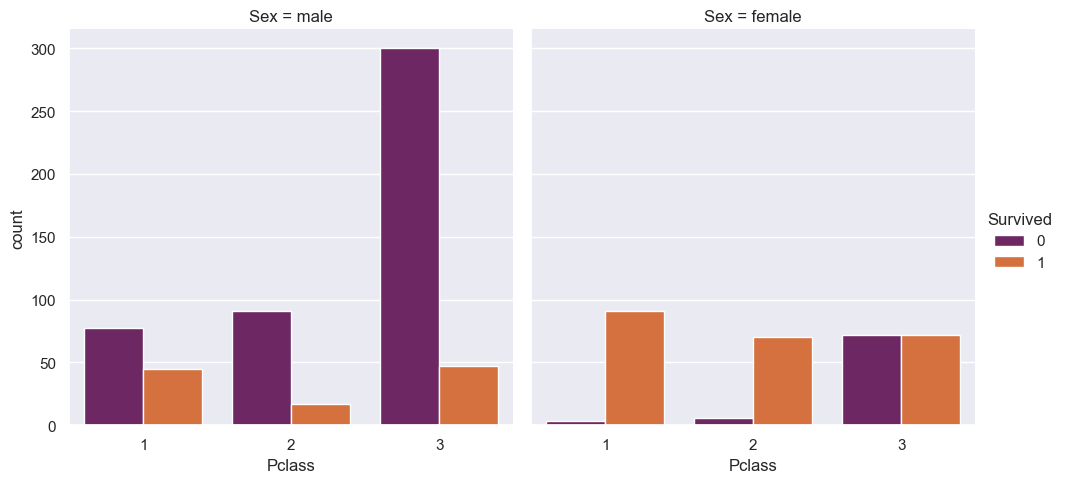

In [11]:
sns.catplot(x = 'Pclass', hue = 'Survived', col = 'Sex', kind = 'count', data = df_train, palette="inferno")


### Age

<Figure size 1500x500 with 0 Axes>

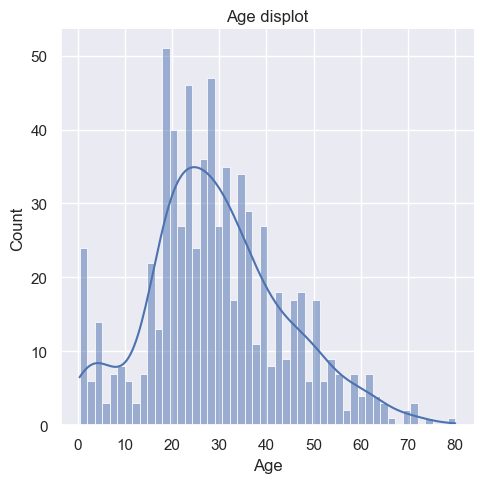

In [12]:
plt.figure(figsize=(15, 5))
sns.displot(df_train["Age"], kde=True, bins= 50)
plt.title("Age displot")

plt.tight_layout()

<Figure size 900x1200 with 0 Axes>

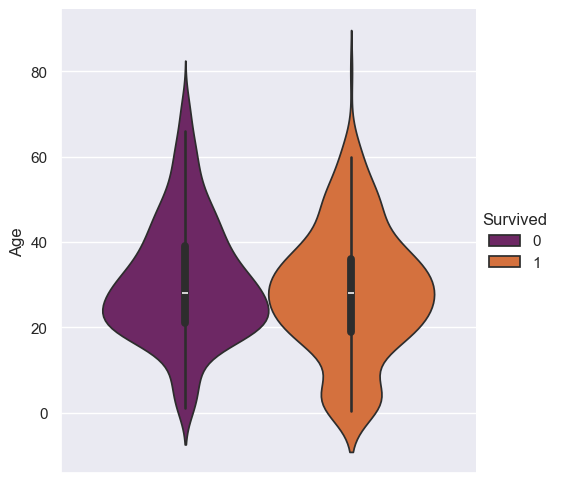

,count,mean,std,min,25%,50%,75%,max
Survived,,,,,,,,
0,424.0,30.626179,14.172110,1.00,21.0,28.0,39.0,74.0
1,290.0,28.343690,14.950952,0.42,19.0,28.0,36.0,80.0


In [13]:
plt.figure(figsize=(9, 12))
sns.catplot(y="Age", hue="Survived", data=df_train, kind="violin", palette="inferno")
plt.show()
df_train.groupby(["Survived"])["Age"].describe()

### SibSp

<Axes: xlabel='SibSp,Sex'>

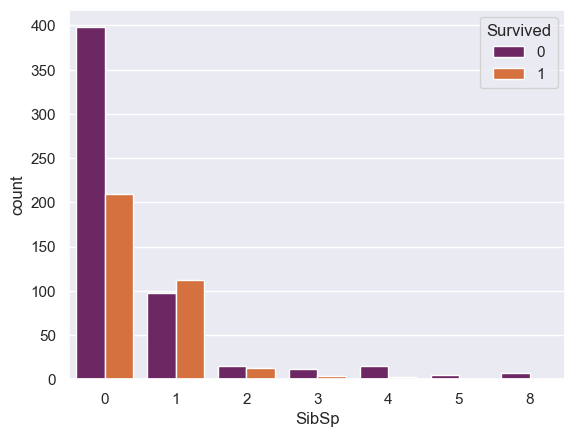

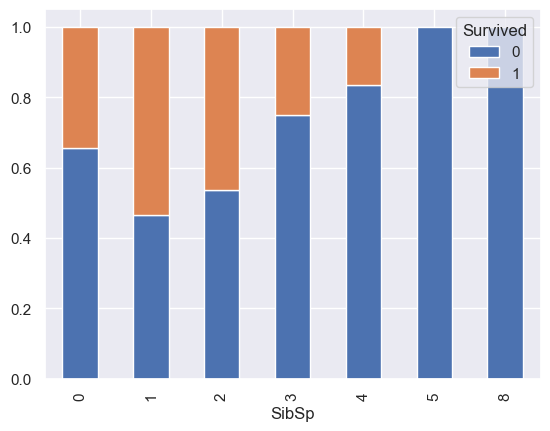

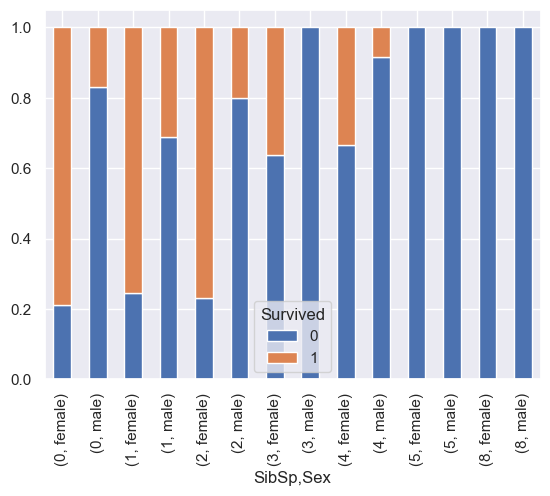

In [14]:

sns.countplot(x= "SibSp", hue="Survived", data=df_train, palette="inferno")

b = df_train.groupby("SibSp")["Survived"].value_counts(normalize=True).unstack()
c = df_train.groupby(["SibSp", "Sex"])["Survived"].value_counts(normalize=True).unstack()
b.plot(kind="bar", stacked=True)
c.plot(kind="bar", stacked=True)


<Axes: xlabel='SibSp', ylabel='Survived'>

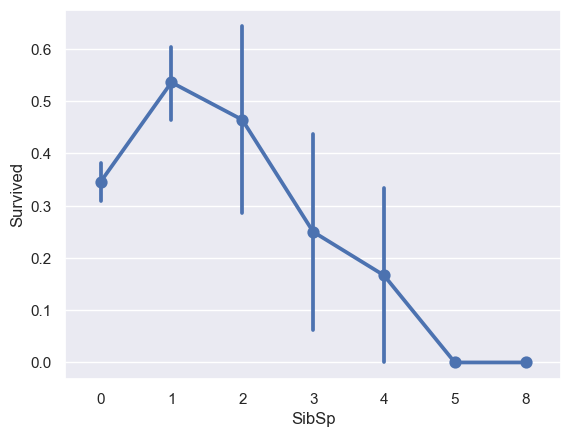

In [15]:
sns.pointplot(x= "SibSp", y= "Survived", data=df_train)

### Parch

<Axes: xlabel='Parch,Sex'>

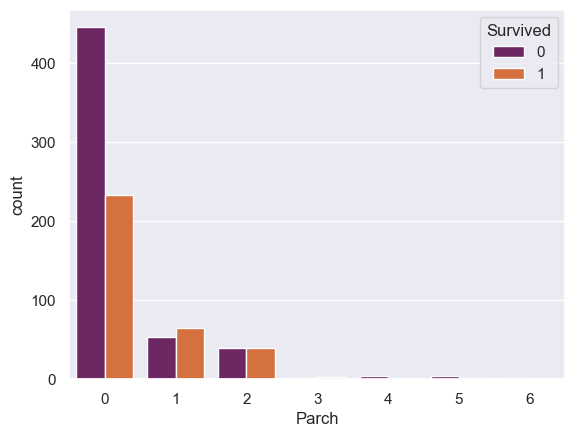

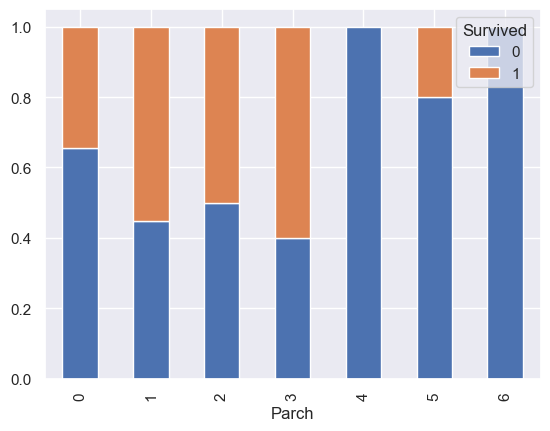

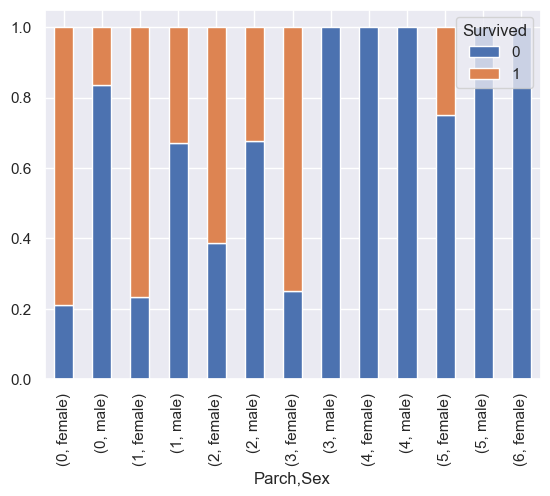

In [16]:
sns.countplot(x= "Parch", hue="Survived", data=df_train, palette="inferno")

b = df_train.groupby("Parch")["Survived"].value_counts(normalize=True).unstack()
c = df_train.groupby(["Parch", "Sex"])["Survived"].value_counts(normalize=True).unstack()
b.plot(kind="bar", stacked=True)
c.plot(kind="bar", stacked=True)

<Axes: xlabel='Parch', ylabel='Survived'>

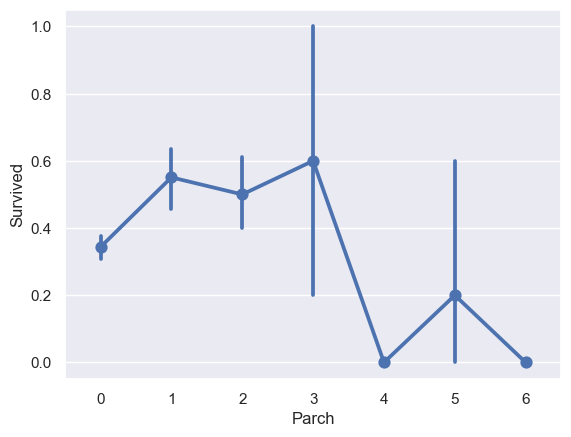

In [17]:
sns.pointplot(x= "Parch", y= "Survived", data=df_train)

### Embarked

Text(0.5, 1.0, 'Sex by Embarked')

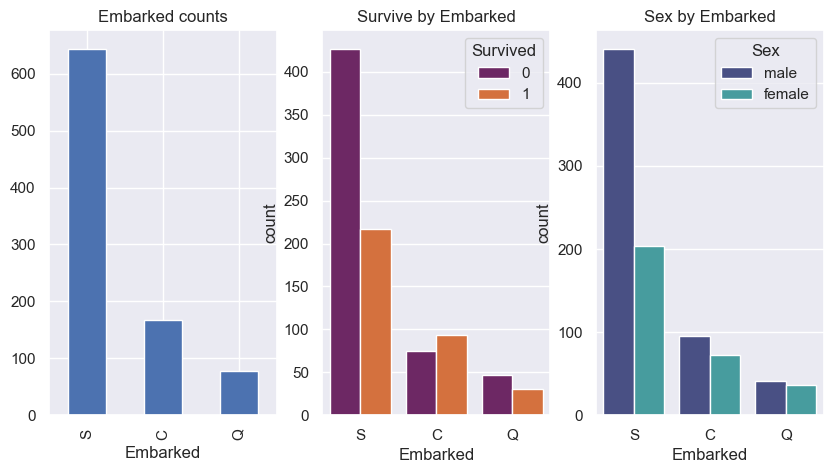

In [18]:
f, ax = plt.subplots(1, 3, figsize = (10, 5))
df_train["Embarked"].value_counts().plot.bar(ax=ax[0])
ax[0].set_title("Embarked counts")
sns.countplot(x="Embarked", hue="Survived", data=df_train, ax=ax[1], palette="inferno")
ax[1].set_title("Survive by Embarked")
sns.countplot(x="Embarked", hue="Sex", data=df_train, ax=ax[2], palette="mako")
ax[2].set_title("Sex by Embarked")

### Fare

Text(0.5, 1.0, 'Fare histplot')

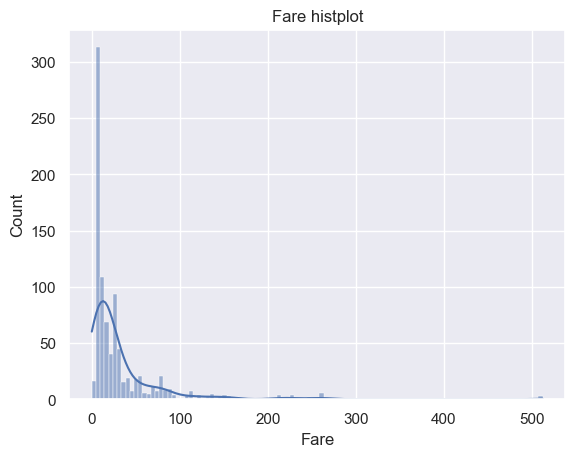

In [19]:
sns.histplot(df_train["Fare"], kde=True)
plt.title("Fare histplot")

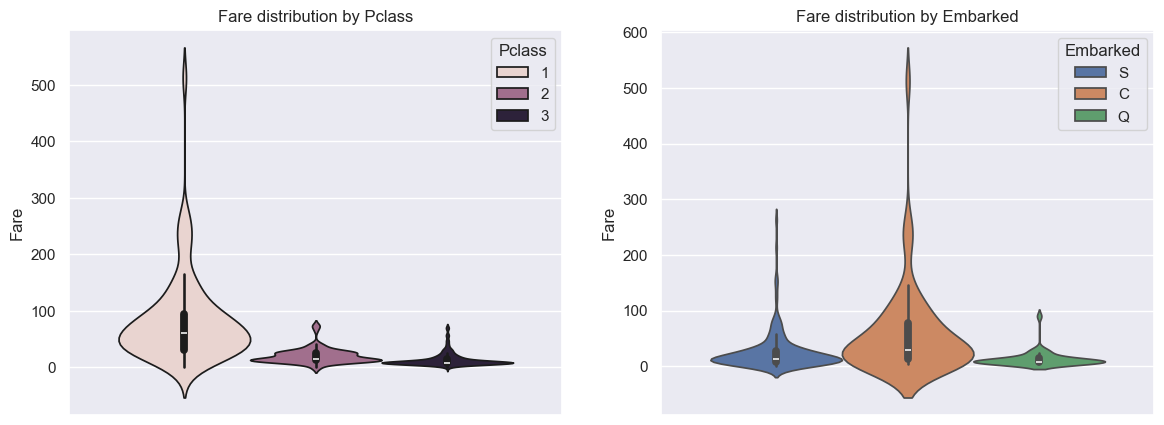

Pclass 별 Fare 기술통계:


,count,mean,std,min,25%,50%,75%,max
Pclass,,,,,,,,
1,216.0,84.154687,78.380373,0.0,30.92395,60.2875,93.5,512.3292
2,184.0,20.662183,13.417399,0.0,13.00000,14.2500,26.0,73.5000
3,491.0,13.675550,11.778142,0.0,7.75000,8.0500,15.5,69.5500


In [20]:
f, ax = plt.subplots(1, 2, figsize=(14, 5))
sns.violinplot(y="Fare", hue="Pclass", data=df_train, ax=ax[0])

ax[0].set_title("Fare distribution by Pclass")
sns.violinplot(y="Fare", hue="Embarked", data=df_train, ax=ax[1])
ax[1].set_title("Fare distribution by Embarked")
plt.show()

print("Pclass 별 Fare 기술통계:")
df_train.groupby(["Pclass"])["Fare"].describe()

### 새로운 특성 생성
Family: SibSp + Parch int64
Title: 미들네임. 편의상 Mr, Miss, Mrs, Master, Others로 분류함.
Gen: 나이가 16살 이하라면 C(Child), 60살 이상이라면 E(Elder), 둘 다 아니라면 A(Adult) 로 분류


#### family

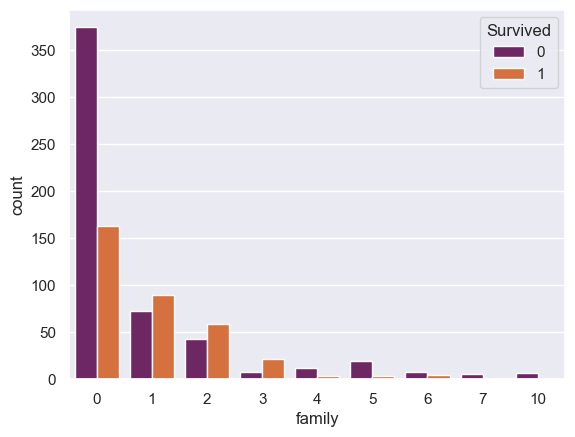

family
0     537
1     161
2     102
3      29
5      22
4      15
6      12
10      7
7       6
Name: count, dtype: int64

In [21]:
#새로운 특성 생성

df_train["family"] = df_train["SibSp"] + df_train["Parch"]
df_test["family"] = df_test["SibSp"] + df_test["Parch"]
sns.countplot(x="family", hue="Survived", data=df_train, palette="inferno")
plt.show()
df_train["family"].value_counts()

#### title

C:\Users\ys\AppData\Local\Temp\ipykernel_6956\1510595640.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = df_title_all, palette="tab10", order=df_title_all.value_counts().index)


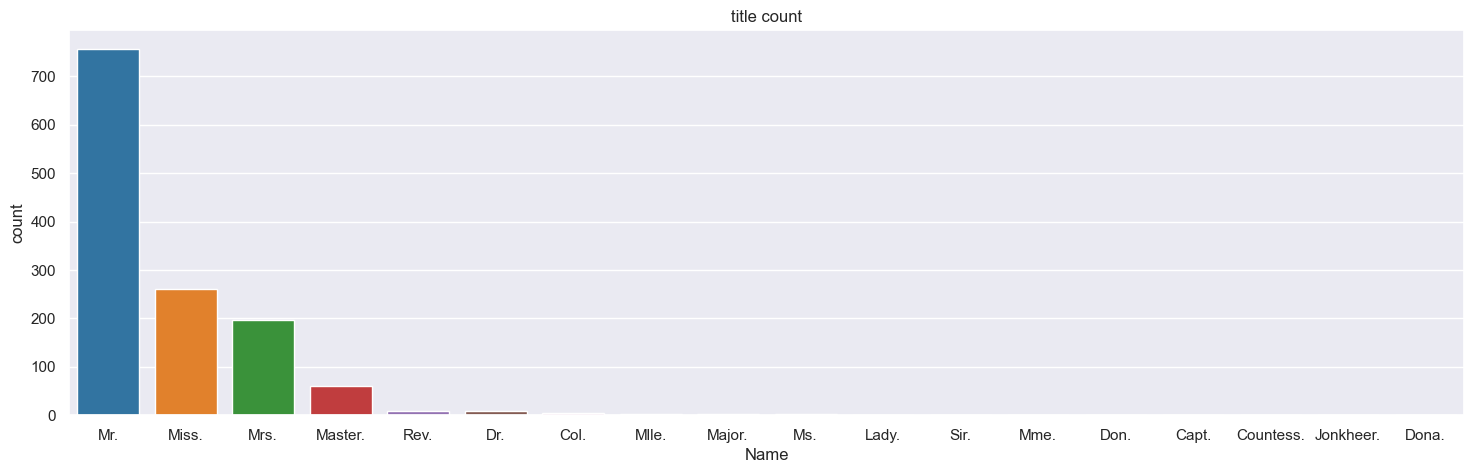

Name
Mr.          757
Miss.        260
Mrs.         197
Master.       61
Rev.           8
Dr.            8
Col.           4
Mlle.          2
Major.         2
Ms.            2
Lady.          1
Sir.           1
Mme.           1
Don.           1
Capt.          1
Countess.      1
Jonkheer.      1
Dona.          1
Name: count, dtype: int64


In [22]:
Title_re = re.compile("[a-zA-Z]*[.]")

def extract_title(name: str):
    m = Title_re.search(name)
    return m.group()
df_title_all = df_all["Name"].apply(extract_title)

plt.figure(figsize=(18, 5))
sns.countplot(x = df_title_all, palette="tab10", order=df_title_all.value_counts().index)
plt.title("title count")
plt.show()

print(df_title_all.value_counts())


In [23]:
title_dict = {  'Mr.':     'Mr',
                'Mrs.':    'Mrs',
                'Miss.':   'Miss',
                'Master.': 'Master',
                'Ms.':     'Miss',
                'Mme.':    'Mrs',
                'Mlle.':   'Miss',

                'Capt.':   'others',
                'Col.':    'others',
                'Major.':  'others',
                'Dr.':     'others',
                'Rev.':    'others',
                'Sir.':    'others',
                'the Countess.': 'others',
                'Lady.':   'others',
                'Jonkheer.': 'others',
                'Don.':    'others',
                'Dona.':   'others' }


df_title_all = df_title_all.map(title_dict)


C:\Users\ys\AppData\Local\Temp\ipykernel_6956\347078420.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = "title", data= df_all, palette="tab10", order=df_title_all.value_counts().index, ax=ax[0])


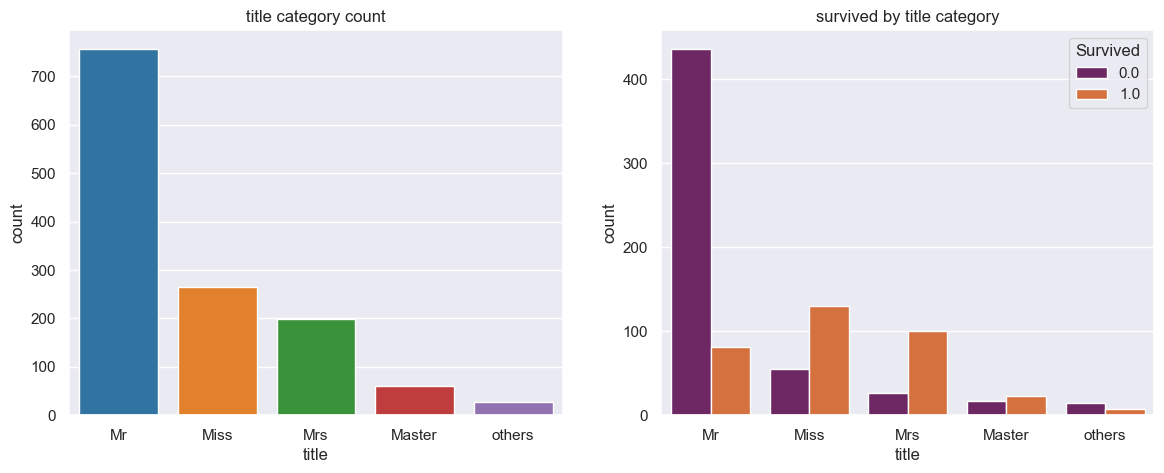

In [24]:
df_all["title"] = df_title_all

f, ax = plt.subplots(1, 2, figsize=(14, 5))
sns.countplot(x = "title", data= df_all, palette="tab10", order=df_title_all.value_counts().index, ax=ax[0])
ax[0].set_title("title category count")
sns.countplot(x = "title", data= df_all, hue="Survived", palette="inferno", order=df_title_all.value_counts().index, ax=ax[1])
ax[1].set_title("survived by title category" )
plt.show()

In [25]:
#훈련 세트와 테스트 세트에 title category 추가
df_train["title"] = df_title_all.loc[df_train.index]
df_test["title"] = df_title_all.loc[df_test.index]

#### Gen

<Axes: xlabel='Gen', ylabel='count'>

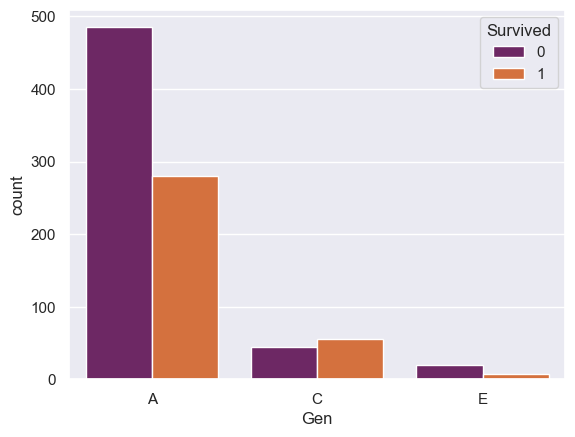

In [27]:
#어린이와 노인을 구별하여 생존률 탐색
#C = child, E = Elder, A= Adult
def child_and_elder(age: float):
    if age <= 16:
        return "C"
    elif age >= 60: 
        return "E"
    else:
        return "A"
    

df_train["Gen"] = df_train["Age"].apply(child_and_elder)
df_test["Gen"] = df_test["Age"].apply(child_and_elder)

sns.countplot(x="Gen", hue="Survived", data=df_train, palette="inferno")

### 결측치 보완

In [28]:
#위에서 확인한 각각의 결측치를 중앙값과 최빈값로 채움
df_train["Age"].fillna(df_train["Age"].median(), inplace = True)
df_test["Age"].fillna(df_test["Age"].median(), inplace = True) 
df_train["Embarked"].fillna("S", inplace = True)
df_train["title"].fillna("Mr", inplace = True)
df_test["Fare"].fillna(df_test["Fare"].median(), inplace = True)

#결측치가 너무 많은 Cabin 열은 삭제
df_train.drop("Cabin", axis=1, inplace=True)
df_test.drop("Cabin", axis=1, inplace=True)

pd.concat([df_train.isna().sum(), df_test.isna().sum()], axis=1)

,0,1
Survived,0,NaN
Pclass,0,0.0
Name,0,0.0
Sex,0,0.0
Age,0,0.0
SibSp,0,0.0
Parch,0,0.0
Ticket,0,0.0
Fare,0,0.0
Embarked,0,0.0


#### 특성 스케일링 및 범주형 특성 변환
범주형 특성인 Sex, Embarked, Pclass를 원-핫 표현으로 바꾸고 사용하기 어려운 Name, Ticket은 제외
스케일링은 Age, Fare에 이상치가 적지 않으므로 표준화하여 스케일링함

In [29]:
df_train_drop = df_train.drop(["Name", "Ticket"], axis=1)
df_train_en = pd.get_dummies(df_train_drop)

In [30]:
df_test_drop = df_test.drop(["Name", "Ticket"], axis=1)
df_test_en = pd.get_dummies(df_test_drop)

In [31]:
df_train_en.info()
draw_line()
df_test_en.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 20 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Survived      891 non-null    int64  
 1   Pclass        891 non-null    int64  
 2   Age           891 non-null    float64
 3   SibSp         891 non-null    int64  
 4   Parch         891 non-null    int64  
 5   Fare          891 non-null    float64
 6   family        891 non-null    int64  
 7   Sex_female    891 non-null    bool   
 8   Sex_male      891 non-null    bool   
 9   Embarked_C    891 non-null    bool   
 10  Embarked_Q    891 non-null    bool   
 11  Embarked_S    891 non-null    bool   
 12  title_Master  891 non-null    bool   
 13  title_Miss    891 non-null    bool   
 14  title_Mr      891 non-null    bool   
 15  title_Mrs     891 non-null    bool   
 16  title_others  891 non-null    bool   
 17  Gen_A         891 non-null    bool   
 18  Gen_C         891 non-null    bool 

In [32]:
corr_matrix = df_train_en.corr(numeric_only=True)
corr_matrix["Survived"]

Survived        1.000000
Pclass         -0.338481
Age            -0.064910
SibSp          -0.035322
Parch           0.081629
Fare            0.257307
family          0.016639
Sex_female      0.543351
Sex_male       -0.543351
Embarked_C      0.168240
Embarked_Q      0.003650
Embarked_S     -0.149683
title_Master    0.085221
title_Miss      0.335636
title_Mr       -0.546521
title_Mrs       0.341994
title_others   -0.021481
Gen_A          -0.090315
Gen_C           0.121485
Gen_E          -0.040857
Name: Survived, dtype: float64

In [37]:
#Survived를 제외한 특성을 표준화하기 위해 미리 타겟과 변수 분리
X_train, X_val, y_train, y_val = train_test_split(df_train_en.drop("Survived", axis=1), df_train_en["Survived"], test_size=0.25, random_state=42)

In [47]:
#훈련 데이터셋 표준화
scaler = StandardScaler()
feat_scaled = scaler.fit_transform(X_train)
X_train_scaled = pd.DataFrame(feat_scaled, columns=X_train.columns)


In [44]:
#val 데이터셋 표준화
feat_scaled = scaler.fit_transform(X_val)
X_val_scaled = pd.DataFrame(feat_scaled, columns=X_val.columns)

In [46]:
#테스트 데이터셋 표준화
feat_scaled = scaler.fit_transform(df_test_en)
test_scaled = pd.DataFrame(feat_scaled, columns=df_test_en.columns)

#### 모형 선택
후보 모형<br>
* 로지스틱 회귀
* 결정 트리
* 랜덤 포레스트
* K-최근접 이웃
* 가우시안 나이브 베이즈

In [53]:
# 로지스틱 회귀
LR = LogisticRegression()
LR.fit(X_train_scaled, y_train)
predict_LR = LR.predict(X_val_scaled)

print(confusion_matrix(y_val, predict_LR))
print(classification_report(y_val, predict_LR))

[[115  19]
 [ 26  63]]
              precision    recall  f1-score   support

           0       0.82      0.86      0.84       134
           1       0.77      0.71      0.74        89

    accuracy                           0.80       223
   macro avg       0.79      0.78      0.79       223
weighted avg       0.80      0.80      0.80       223



In [56]:
#결정 트리
dtree = DecisionTreeClassifier() 
dtree.fit(X_train_scaled, y_train)
predict_dtree = dtree.predict(X_val_scaled)

print(confusion_matrix(y_val, predict_dtree))
print(classification_report(y_val, predict_dtree))

[[84 50]
 [28 61]]
              precision    recall  f1-score   support

           0       0.75      0.63      0.68       134
           1       0.55      0.69      0.61        89

    accuracy                           0.65       223
   macro avg       0.65      0.66      0.65       223
weighted avg       0.67      0.65      0.65       223



In [57]:
#최대 깊이와 특성을 제한한 결정 트리
dtree_add = DecisionTreeClassifier(max_depth= 6, max_features= 6)
dtree_add.fit(X_train_scaled, y_train)
predict_dtree_add = dtree_add.predict(X_val_scaled)

print(confusion_matrix(y_val, predict_dtree_add))
print(classification_report(y_val, predict_dtree_add))

[[116  18]
 [ 32  57]]
              precision    recall  f1-score   support

           0       0.78      0.87      0.82       134
           1       0.76      0.64      0.70        89

    accuracy                           0.78       223
   macro avg       0.77      0.75      0.76       223
weighted avg       0.77      0.78      0.77       223



In [59]:
#랜덤 포레스트 
rf = RandomForestClassifier()
rf.fit(X_train_scaled, y_train)
predict_rf = rf.predict(X_val_scaled)

print(confusion_matrix(y_val, predict_rf))
print(classification_report(y_val, predict_rf))

[[99 35]
 [28 61]]
              precision    recall  f1-score   support

           0       0.78      0.74      0.76       134
           1       0.64      0.69      0.66        89

    accuracy                           0.72       223
   macro avg       0.71      0.71      0.71       223
weighted avg       0.72      0.72      0.72       223



In [60]:
#최대 깊이와 특성을 제한한 랜덤 포레스트
rf_add = RandomForestClassifier(max_depth= 6, max_features= 6)
rf_add.fit(X_train_scaled, y_train)
predict_rf_add = rf_add.predict(X_val_scaled)

print(confusion_matrix(y_val, predict_rf_add))
print(classification_report(y_val, predict_rf_add))

[[119  15]
 [ 23  66]]
              precision    recall  f1-score   support

           0       0.84      0.89      0.86       134
           1       0.81      0.74      0.78        89

    accuracy                           0.83       223
   macro avg       0.83      0.81      0.82       223
weighted avg       0.83      0.83      0.83       223



In [62]:
#K 최근접 이웃 -> 이웃 수 5명
knn_5 = KNeighborsClassifier(n_neighbors=5)
knn_5.fit(X_train_scaled, y_train)
predict_knn_5 = knn_5.predict(X_val_scaled)

print(confusion_matrix(y_val, predict_knn_5))
print(classification_report(y_val, predict_knn_5))


[[109  25]
 [ 23  66]]
              precision    recall  f1-score   support

           0       0.83      0.81      0.82       134
           1       0.73      0.74      0.73        89

    accuracy                           0.78       223
   macro avg       0.78      0.78      0.78       223
weighted avg       0.79      0.78      0.79       223



In [64]:
#K 최근접 이웃 -> 이웃 수 20명
knn_20 = KNeighborsClassifier(n_neighbors=20)
knn_20.fit(X_train_scaled, y_train)
predict_knn_20 = knn_20.predict(X_val_scaled)

print(confusion_matrix(y_val, predict_knn_20))
print(classification_report(y_val, predict_knn_20))

[[117  17]
 [ 23  66]]
              precision    recall  f1-score   support

           0       0.84      0.87      0.85       134
           1       0.80      0.74      0.77        89

    accuracy                           0.82       223
   macro avg       0.82      0.81      0.81       223
weighted avg       0.82      0.82      0.82       223



In [65]:
gnb = GaussianNB()
gnb.fit(X_train_scaled, y_train)
predict_gnb = gnb.predict(X_val_scaled)

print(confusion_matrix(y_val, predict_gnb))
print(classification_report(y_val, predict_gnb))

[[113  21]
 [ 21  68]]
              precision    recall  f1-score   support

           0       0.84      0.84      0.84       134
           1       0.76      0.76      0.76        89

    accuracy                           0.81       223
   macro avg       0.80      0.80      0.80       223
weighted avg       0.81      0.81      0.81       223

